DIABETES CLASSIFICATION

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

import sklearn

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0 null values in our dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

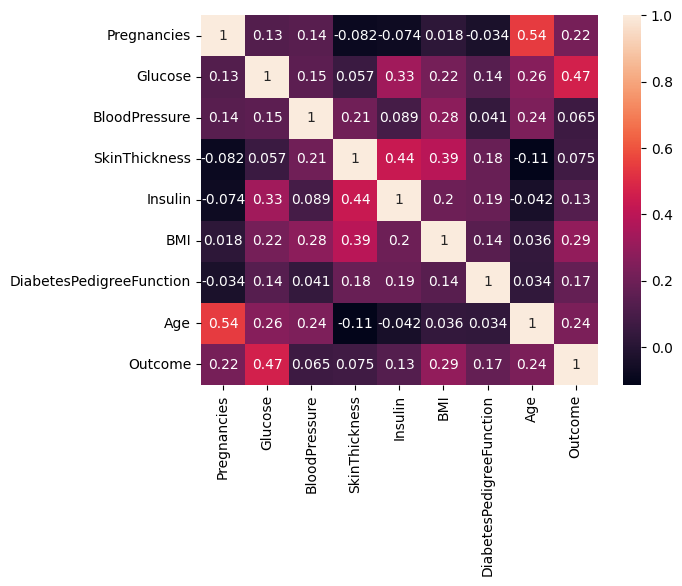

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

TRAIN TEST SPLIT

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

STANDARDIZATION of data (Feature Scaling)

In [11]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

TESTING THE TRAINING DATA WITH ALL SUPERVISED CLASSIFIER MODELS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [13]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "KNN Classifier":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7821
----------------------------------
Model performance for Test set
- Accuracy: 0.7359


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8343
----------------------------------
Model performance for Test set
- Accuracy: 0.7446


KNN Classifier
Model performance for Training set
- Accuracy: 0.8250
----------------------------------
Model performance for Test set
- Accuracy: 0.7013


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7143


Random Forest
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7489


Gradient Boost
Model performance for Training set
- Accuracy: 0.9497
----------------------------------
Model performance for Test set
- Accuracy: 0.7403


Adaboost
Model performance for Training set
- Acc

SUMMARY of All models ACCURACY SCORE on Testing Dataset 

Logisitic Regression : 73%

Support Vector Classifier : 74.4%

Decision Tree : 70.5%

Random Forest : 74.89% 

Gradient Boost : 74.46%

Adaboost : 75.32%

Xgboost : 72.73%



So among All the models which are tested on test dataset SVC ,Random Forest , Gradient Boost , Adaboost models are giving the highest accuracy score

This Accuracy Score is Without HYPERPARAMETER TUNING AND CROSS VALIDATION of the models

If we perform Hyerparater tune this models maybe will can get much better accuracies

And then we can select the best model which suits for classifying our data based on Accuracy scores

HYPERPARAMETER TUNING AND CROSS VALIDATION using Randomized Search cv

In [14]:
svc_params = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

rf_params = {
    "max_depth": [5, 10, 15, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10, 15],
    "n_estimators": [50, 100, 200, 500],
    "criterion": ['gini', 'entropy']
}
 
gb_params = {
    "loss": ['log_loss'],
    "criterion": ['friedman_mse'],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 10]
}


adaboost_params = {
    "n_estimators": [50, 100, 200],
    "algorithm": ['SAMME']
}



In [15]:
randomcv_models = [
                   ("Support vector Classifier", SVC(), svc_params),
                   ("Randon Forest", RandomForestClassifier(), rf_params),
                   ("Gradient Boosting Classifier", GradientBoostingClassifier(), gb_params),
                   ("AdaBoost Classifier", AdaBoostClassifier(), adaboost_params)
                   ]

randomcv_models

[('Support vector Classifier',
  SVC(),
  {'C': [0.1, 1, 10, 100, 1000],
   'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   'degree': [2, 3, 4]}),
 ('Randon Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 10, 15, None],
   'max_features': ['sqrt', 'log2', None],
   'min_samples_split': [2, 5, 10, 15],
   'n_estimators': [50, 100, 200, 500],
   'criterion': ['gini', 'entropy']}),
 ('Gradient Boosting Classifier',
  GradientBoostingClassifier(),
  {'loss': ['log_loss'],
   'criterion': ['friedman_mse'],
   'min_samples_split': [2, 5, 10],
   'n_estimators': [50, 100, 200, 500],
   'max_depth': [3, 5, 10]}),
 ('AdaBoost Classifier',
  AdaBoostClassifier(),
  {'n_estimators': [50, 100, 200], 'algorithm': ['SAMME']})]

In [16]:
import warnings
warnings.filterwarnings("ignore")


In [20]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    randomcv = RandomizedSearchCV(estimator=model, 
                                  param_distributions=params, 
                                  n_iter=100, 
                                  cv=cv, 
                                  verbose=2, 
                                  n_jobs=-1)
    
    randomcv.fit(X_train_scaled, y_train)
    model_param[name] = randomcv.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
---------------- Best Params for Support vector Classifier -------------------
{'kernel': 'rbf', 'gamma': 0.0001, 'degree': 3, 'C': 1000}
---------------- Best Params for Randon Forest -------------------
{'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
---------------- Best Params for Gradient Boosting Classifier -------------------
{'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 3, 'loss': 'log_loss', 'criterion': 'friedman_mse'}
---------------- Best Params for AdaBoost Classifier -------------------
{'n_estimators': 100, 'algorithm': 'SAMME'}


Now After Hyperparameter tuning we finally got the best parameters for training the models to get best ACCURACY SCORE

In [26]:
models={
    "Support vector classifier":SVC(kernel='rbf',gamma=0.0001,degree=4,C=1000),
    "Random Forest":RandomForestClassifier(n_estimators=50,min_samples_split=5,
                                          max_features='log2',max_depth=15,criterion='gini'),
    "Gradient Boosting Classifier":GradientBoostingClassifier(n_estimators=50,min_samples_split=5,max_depth=3,loss='log_loss',criterion='friedman_mse'
                           ),
    "AdaBoost Classifier":AdaBoostClassifier(n_estimators=100,algorithm='SAMME')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('='*35)
    print('\n')

Support vector classifier
Model performance for Training set
- Accuracy: 0.6499
- F1 score: 0.5120
----------------------------------
Model performance for Test set
- Accuracy: 0.6537
- F1 score: 0.5168


Random Forest
Model performance for Training set
- Accuracy: 0.6499
- F1 score: 0.5120
----------------------------------
Model performance for Test set
- Accuracy: 0.6537
- F1 score: 0.5168


Gradient Boosting Classifier
Model performance for Training set
- Accuracy: 0.6499
- F1 score: 0.5120
----------------------------------
Model performance for Test set
- Accuracy: 0.6537
- F1 score: 0.5168


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6499
- F1 score: 0.5120
----------------------------------
Model performance for Test set
- Accuracy: 0.6537
- F1 score: 0.5168




HYPERPARAMETER TUNING Using GridSearchCV 

In [ ]:
gridcv_models = [
                   ("Support vector Classifier", SVC(), svc_params),
                   ("Randon Forest", RandomForestClassifier(), rf_params),
                   ("Gradient Boosting Classifier", GradientBoostingClassifier(), gb_params),
                   ("AdaBoost Classifier", AdaBoostClassifier(), adaboost_params)
                   ]


In [18]:
models={
    "Support vector classifier":SVC(kernel='rbf',gamma=0.0001,degree=2,C=100),
    "Random Forest":RandomForestClassifier(n_estimators=50,min_samples_split=5,
                                          max_features='sqrt',max_depth=10,criterion='gini'),
    "Gradient Boosting Classifier":GradientBoostingClassifier(n_estimators=50,min_samples_split=5,max_depth=3,loss='log_loss',criterion='friedman_mse'
                           ),
    "AdaBoost Classifier":AdaBoostClassifier(n_estimators=100,algorithm='SAMME')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))

    print('='*35)
    print('\n')

Support vector classifier
Model performance for Training set
- Accuracy: 0.6499
----------------------------------
Model performance for Test set
- Accuracy: 0.6537


Random Forest
Model performance for Training set
- Accuracy: 0.6499
----------------------------------
Model performance for Test set
- Accuracy: 0.6537


Gradient Boosting Classifier
Model performance for Training set
- Accuracy: 0.6499
----------------------------------
Model performance for Test set
- Accuracy: 0.6537


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6499
----------------------------------
Model performance for Test set
- Accuracy: 0.6537




USING F1 SCORE instead of ACCURACY SCORE

In [24]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

randomcv = RandomizedSearchCV(
    estimator=model, 
    param_distributions=params, 
    n_iter=50,  # Reduce unnecessary computation
    scoring='f1',  # Use F1-score
    cv=cv, 
    verbose=2, 
    n_jobs=-1
)

randomcv.fit(X_train_scaled, y_train)
best_params = randomcv.best_params_

# Retrain model with best parameters
best_model = model.set_params(**best_params)
best_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


SVC(C=1000, degree=4, gamma=0.0001)

In [39]:
best_params

{'kernel': 'rbf', 'gamma': 0.0001, 'degree': 4, 'C': 1000}

In [25]:
best_model_f1 = f1_score(y_test, y_test_pred, average='weighted')

In [26]:
print(best_model_f1)

0.5167833911289409


In [ ]:
best_model_accuracy = accuracy_score(y_test,y_test_pred)

In [ ]:
best_model_accuracy

0.6536796536796536

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

Accuracy=accuracy_score(y_test_pred,y_test)
print(Accuracy)

best_model_AUC_ROC_score = roc_auc_score(y_test,y_test_pred)
print("AUC_ROC SCORE : ",best_model_AUC_ROC_score)

f1 = f1_score(y_test, y_test_pred, average='weighted')  
print("F1 Score:", f1)

print(classification_report(y_test_pred,y_test))
print(confusion_matrix(y_test_pred,y_test))

0.6536796536796536
AUC_ROC SCORE :  0.5
F1 Score: 0.5167833911289409
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       231
           1       0.00      0.00      0.00         0

    accuracy                           0.65       231
   macro avg       0.50      0.33      0.40       231
weighted avg       1.00      0.65      0.79       231

[[151  80]
 [  0   0]]


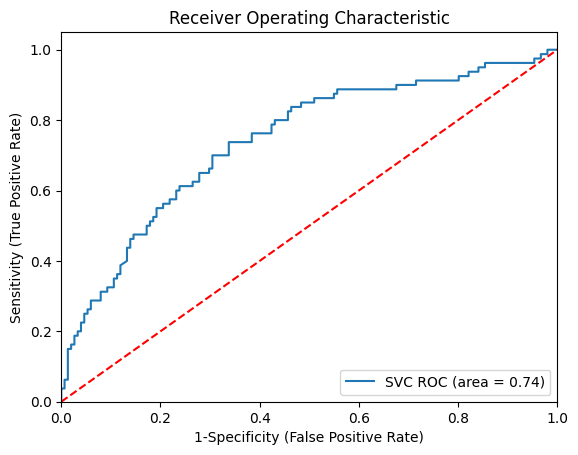

In [44]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

# Initialize figure
plt.figure()

# Define models
auc_models = [
    {
        'label': 'SVC',
        'model': SVC(kernel='rbf', gamma=0.0001, degree=4, C=1000, probability=True)
    }
]

# Loop through models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    
    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{algo['label']} ROC (area = {auc_score:.2f})")

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()
